In [19]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [20]:
raw_df = pd.read_csv('/Users/hto/Documents/Statistics/marketing_ab.csv',index_col=[0])

### 1. About Dataset

Context: This company runs a new ad campaign on a test group of users, while replacing the ad with a Public Service Annoucement (PSA) or nothing, in the ad space for the control group. 

The project sponsors are interested in answering two questions:

1. Would the new ad campaign be successful?
2. If the campaign was successful, how much of that success could be attributed to the ads?

Data dictionary:

1. user id: User ID (unique)
2. test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
3. converted: If a person bought the product then True, else is False
4. total ads: Amount of ads seen by person
5. most ads day: Day that the person saw the biggest amount of ads
6. most ads hour: Hour of day that the person saw the biggest amount of ads

In [21]:
df = raw_df.copy()

In [22]:
df.head(5)

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 27.5+ MB


In [24]:
df.isna().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

#### Exploratory Data Analysis

In [25]:
df.describe().round(2)

,user id,total ads,most ads hour
count,588101.00,588101.00,588101.00
mean,1310692.22,24.82,14.47
std,202225.98,43.72,4.83
min,900000.00,1.00,0.00
25%,1143190.00,4.00,11.00
50%,1313725.00,13.00,14.00
75%,1484088.00,27.00,18.00
max,1654483.00,2065.00,23.00


In [26]:
#To activate seaborn's visualization design
sns.set() 

Text(0, 0.5, 'Count of users')

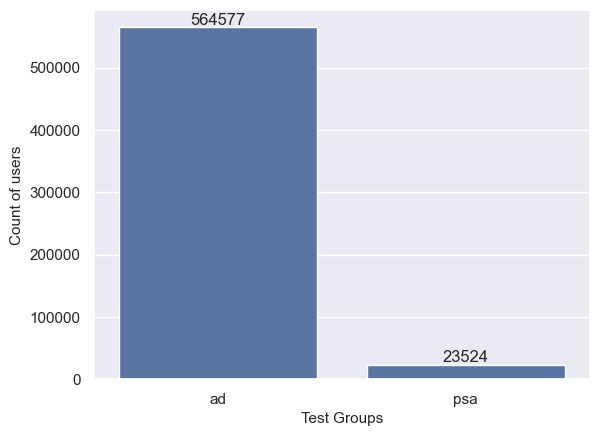

In [27]:
'''
Ad is the test group, where the users are exposed the ad campaign
PSA is the control group, where the ad is replaced by a public service announcement or nothing. 
'''

test_group = df[['test group','user id']].groupby(['test group'], as_index=False).count()
test_group_graph = sns.barplot(data = test_group, x = 'test group', y = 'user id')

test_group_graph.bar_label(test_group_graph.containers[0])
test_group_graph.set_xlabel('Test Groups',fontsize = 11)
test_group_graph.set_ylabel('Count of users',fontsize = 11)

### 2. A/B Testing, Two-sample T-test

In [28]:
test_group_population = df[df['test group'] == 'ad'].shape[0]
purchased_test_group_population = df[(df['test group'] == 'ad') & (df['converted'] == True)].shape[0]
purchase_rate_test_group = purchased_test_group_population / test_group_population * 100

print(f'There is a total of {test_group_population} users in the test group. The conversion rate of this group is {purchase_rate_test_group}')

There is a total of 564577 users in the test group. The conversion rate of this group is 2.5546559636683748


In [29]:
control_group_population = df[df['test group'] == 'psa'].shape[0]
purchased_control_group_population = df[(df['test group'] == 'psa') & (df['converted'] == True)].shape[0]
purchase_rate_control_group = purchased_control_group_population / control_group_population * 100

print(f'There is a total of {control_group_population} users in the control group. The conversion rate of this group is {purchase_rate_control_group}%')

There is a total of 23524 users in the control group. The conversion rate of this group is 1.785410644448223%


In [30]:
conversion_rate_difference = purchase_rate_test_group - purchase_rate_control_group
print(f'We need to conduct a statistical test to understand if the difference of {conversion_rate_difference} is due to chance or not')

We need to conduct a statistical test to understand if the difference of 0.7692453192201518 is due to chance or not


#### State the null & alternative hypothesis and the significant level
1. Null Hypothesis: There is no statistically significant difference between the conversion rate of the ad-exposed group and the psa group
2. Alternative Hypothesis:  There is a statistically significant difference between the conversion rate of the ad-exposed group and the psa group
3. Significant Level: To set at 5%

In [31]:
test_group = df[df['test group'] == 'ad']
control_group = df[df['test group'] == 'psa']

t_stat, p_val = stats.ttest_ind(a=test_group['converted'], b=control_group['converted'])
print(f'The p-value is {p_val}')

The p-value is 1.7033052627831264e-13


In [32]:
if p_val < 0.05:
    print('Reject the null hypothesis: There is a significant difference in conversion rates between the ad-exposed group and the psa group.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in conversion rates between the ad-exposed group and the psa group.')    

Reject the null hypothesis: There is a significant difference in conversion rates between the ad-exposed group and the psa group.


#### Conclusion: 
The ad campaign is a success and we can see the contribution of the ad campaign to the sales through the statistic test. We recommend to expand the use of the ad campaign to a wider user segments.